# Analiza kategorii w sklepie euro.com.pl

## 1. Wprowadzenie

### 1.1 Cel analizy

<p>
Analiza ma na celu poznanie dostępnych kategorii w sklepie internetowym euro.com.pl należącego do sieci sklepów RTV EURO AGD.
Dowiedzmy się, czy sklep RTV EURO AGD jest bardziej RTV, czy AGD, a może dominują produkty z nietytułowych kategorii. Wnioski z analizy będą pomocne przy analizowaniu promocji, cyklicznie pojawiających się w tym sklepie.
<p>

### 1.2 Pochodzenie zbioru danych

<p>
    Dane z analizowanego pliku pochodzą ze sklepu internetowego euro.com.pl. Zostały zebrane w dniu 31.01.2022 r. W tym celu posłużyłem się skryptem scrapującym napisanym w Pythonie. Kod źródłowy wykorzystanego skryptu oraz plik z zebranymi danymi znajduje się w folderze 'categories' tego repozytorium.
</p>

## 2. Wczytanie potrzebnych bibliotek

In [267]:
import pandas as pd
import matplotlib.pyplot as plt

## 3. Wczytanie zbioru z danymi

In [268]:
df = pd.read_csv('./categories/categories.csv', header=0)

### 3.1 Przegląd zbioru.

In [269]:
print(f'Zbiór zawiera {df.shape[0]} obserwacji oraz {df.shape[1]} zmiennych.')

Zbiór zawiera 489 obserwacji oraz 4 zmiennych.


In [270]:
print(f'Dostępne zmienne: {df.columns.tolist()}')

Dostępne zmienne: ['parent_category', 'category', 'link_to_category', 'offers_count']


In [271]:
print(f'Typy zmiennych:')
df.dtypes

Typy zmiennych:


parent_category      object
category             object
link_to_category     object
offers_count        float64
dtype: object

In [272]:
print(f'Zbior zawiera {len(df.parent_category.unique())} kategorii głównych:\n{df.parent_category.unique()}')

Zbior zawiera 7 kategorii głównych:
['agd' 'agd-do-zabudowy' 'agd-male' 'rtv' 'telefony-i-nawigacja-gps'
 'komputery' 'gry-i-konsole']


In [273]:
print(f'Zbior zawiera {len(df.category.unique())} kategorii podrzędnych.')

Zbior zawiera 418 kategorii podrzędnych.


In [274]:
nulls = pd.DataFrame({'has_null': df.isnull().any()})
nulls['qty'] = df.isnull().sum()
nulls['%']= round((df.isnull().mean()*100),2)
nulls

,has_null,qty,%
parent_category,False,0,0.0
category,False,0,0.0
link_to_category,False,0,0.0
offers_count,False,0,0.0


<p>
    Zbior nie zawiera obserwacji, w których brakowało by danych.
</p>

## 4. Analiza zbioru

<p>
Na potrzeby dalszej analizy wykorzystywać będę wszystkie zmienne oprócz zmiennej zawierającej link do danej kategorii w sklepie euro.com.pl, dlatego ją usunę ze zbioru. Bliżej przyjrzę się samym kategoriom głównym, podrzędnym oraz zmiennej opisującej ilość ofert w poszczególnych kategoriach.
</p>

In [275]:
df.drop('link_to_category', axis=1, inplace=True)

### 4.1 Analiza kategorii głównych

#### 4.1.1 Ogólne podsumowanie ilości ofert oraz ilości kategorii podrzędnych

In [276]:
parent_categories_summary = df.groupby(['parent_category']).agg(offers_count=('offers_count','sum'), categories_count=('category', 'count'))
parent_categories_summary = parent_categories_summary.sort_values(by='offers_count', ascending=False)
parent_categories_summary = parent_categories_summary.reset_index()
parent_categories_summary['percent_of_offers'] = parent_categories_summary.offers_count.apply(lambda x: round(x/parent_categories_summary.offers_count.sum()*100, 2))
parent_categories_summary['percent_of_categories'] = parent_categories_summary.categories_count.apply(lambda x: round(x/parent_categories_summary.categories_count.sum()*100, 2))

parent_categories_summary

,parent_category,offers_count,categories_count,percent_of_offers,percent_of_categories
0,komputery,10348.0,98,20.48,20.04
1,telefony-i-nawigacja-gps,9838.0,47,19.47,9.61
2,agd-male,8724.0,157,17.27,32.11
3,rtv,6335.0,73,12.54,14.93
4,agd-do-zabudowy,5993.0,40,11.86,8.18
5,agd,5914.0,39,11.71,7.98
6,gry-i-konsole,3367.0,35,6.66,7.16


In [277]:
parent_categories_summary.agg(['sum'])[['offers_count','categories_count']].T

,sum
offers_count,50519.0
categories_count,489.0


<p>
Analizując dane z powyższej tabeli można wyciągnąć prosty wniosek, iż obecnie to kategorie 'telefony-i-nawigacja-gps' oraz 'komputery' stanowią największą liczbę ofert w sklepie przy prezentowanym podziale na kategorie.
</p>
<p>
Jeśli chodzi o kategorie uwzglednione w nazwie marki sklepu, to wyraźnie wyróżnia się kategoria 'agd-małe' pod względem ilośći ofert oraz kategorii podrzędnych.
</p>
<p>
    Kategorią najmniejszą jest 'gry-i-konsole' - zarówno najmniejszy udział w ofercie oraz kategoriach sklepu.
</p>
<p>
    W tym miejscu warto sięgnąć do definicji sprzetu <a href="https://pl.wikipedia.org/wiki/Artyku%C5%82y_gospodarstwa_domowego">AGD</a> oraz <a href="https://pl.wikipedia.org/wiki/Elektronika_u%C5%BCytkowa">RTV</a>. Uważam tak, gdyż pozwala to zrozumieć, jak wiele innych znaczących kategorii sprzętów elektronicznych wyłoniło się na przestrzeni lat, a które są w ofercie sklepu z założenia na początku mającego sprzedawać tylko sprzęty RTV i AGD.
</p>
<p>
    Sklep ma do zaoferowania ponad 50.5 tysiąca różnych towarów.
</p>

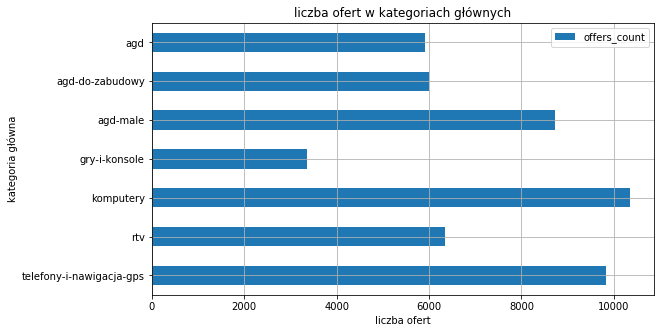

In [278]:
parent_categories_summary[['parent_category','offers_count']].set_index('parent_category').sort_values(by='parent_category', ascending=False).plot.barh(figsize=(9,5))
plt.title('liczba ofert w kategoriach głównych')
plt.xlabel('liczba ofert')
plt.ylabel('kategoria główna')
plt.grid()
plt.savefig('./charts/liczba ofert w kategoriach głównych.png')
plt.show()

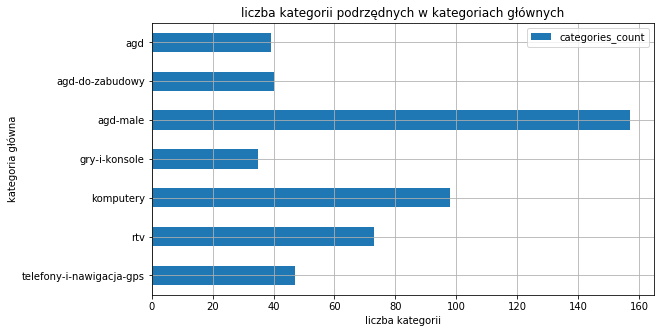

In [279]:
parent_categories_summary[['parent_category','categories_count']].set_index('parent_category').sort_values(by='parent_category', ascending=False).plot.barh(figsize=(9,5))
plt.title('liczba kategorii podrzędnych w kategoriach głównych')
plt.xlabel('liczba kategorii')
plt.ylabel('kategoria główna')
plt.grid()
plt.savefig('./charts/liczba kategorii podrzędnych w kategoriach głównych.png')
plt.show()

#### 4.1.2 Analiza: agd vs rtv vs reszta kategorii

In [280]:
only_within_agd = parent_categories_summary[parent_categories_summary.parent_category.str.contains('agd')]
rtv = parent_categories_summary[parent_categories_summary.parent_category == 'rtv']
without_agd_and_rtv = parent_categories_summary[~parent_categories_summary.parent_category.isin(list(only_within_agd.parent_category) + list(rtv.parent_category))]

In [281]:
only_within_agd

,parent_category,offers_count,categories_count,percent_of_offers,percent_of_categories
2,agd-male,8724.0,157,17.27,32.11
4,agd-do-zabudowy,5993.0,40,11.86,8.18
5,agd,5914.0,39,11.71,7.98


In [282]:
print(f'Suma ofert w kategoriach głównych związanych z AGD: {only_within_agd.offers_count.sum()}')
print(f'Udział ofert z kategorii głównych związanych z AGD w całej ofercie: {round(only_within_agd.percent_of_offers.sum(),2)}%\n')
print(f'Suma kategorii podrzędnych w kategoriach głównych związanych z AGD: {only_within_agd.categories_count.sum()}')
print(f'Udział kategorii podrzędnych związanych z AGD w całym sklepie: {round(only_within_agd.percent_of_categories.sum(),2)}%')

Suma ofert w kategoriach głównych związanych z AGD: 20631.0
Udział ofert z kategorii głównych związanych z AGD w całej ofercie: 40.84%

Suma kategorii podrzędnych w kategoriach głównych związanych z AGD: 236
Udział kategorii podrzędnych związanych z AGD w całym sklepie: 48.27%


In [283]:
rtv

,parent_category,offers_count,categories_count,percent_of_offers,percent_of_categories
3,rtv,6335.0,73,12.54,14.93


In [284]:
without_agd_and_rtv

,parent_category,offers_count,categories_count,percent_of_offers,percent_of_categories
0,komputery,10348.0,98,20.48,20.04
1,telefony-i-nawigacja-gps,9838.0,47,19.47,9.61
6,gry-i-konsole,3367.0,35,6.66,7.16


In [285]:
print(f'Suma ofert w kategoriach głównych niezwiązanych z RTV i AGD: {without_agd_and_rtv.offers_count.sum()}')
print(f'Udział ofert w kategoriach głównych niezwiązanych z RTV i AGD: {without_agd_and_rtv.percent_of_offers.sum()}%\n')
print(f'Suma kategorii podrzędnych w kategoriach głównych niezwiązanych z RTV i AGD: {without_agd_and_rtv.categories_count.sum()}')
print(f'Udział kategorii podrzędnych niezwiązanych z RTV i AGD: {without_agd_and_rtv.percent_of_categories.sum()}%')

Suma ofert w kategoriach głównych niezwiązanych z RTV i AGD: 23553.0
Udział ofert w kategoriach głównych niezwiązanych z RTV i AGD: 46.61%

Suma kategorii podrzędnych w kategoriach głównych niezwiązanych z RTV i AGD: 180
Udział kategorii podrzędnych niezwiązanych z RTV i AGD: 36.81%


##### 4.1.2.1 Wnioski

<p>
Oferty niezwiązane z AGD i RTV stanowią najwiekszą część oferty sklepu euro.com.pl. Na drugim miejscu plasują się kategorie związane z AGD, a dopiero na końcu RTV.</p><p>Powyższe dane pokazują, rozmiar i znaczenie kategorii związanych z komunikacją oraz rozrywką
</p>
<p>
    Najbardziej róznorodną grupą asortymentową są kategorie związane z AGD, a najmniej z RTV.
</p>

### 4.2 Analiza ilości ofert w kategoriach podrzędnych

#### 4.2.1 Wybrane statystyki

In [286]:
df.offers_count.describe()

count     489.000000
mean      103.310838
std       217.343776
min         1.000000
25%        12.000000
50%        33.000000
75%        94.000000
max      2631.000000
Name: offers_count, dtype: float64

In [287]:
df.offers_count.agg(['min', 'median', 'max', 'mean'])

min          1.000000
median      33.000000
max       2631.000000
mean       103.310838
Name: offers_count, dtype: float64

<p>Poniżej kategoria podrzędna z największą liczbą ofert:</p>

In [288]:
df[df.offers_count == df.offers_count.max()]

,parent_category,category,offers_count
330,telefony-i-nawigacja-gps,folie-ochronne,2631.0


<p>Poniżej kategorie podrzędne z najmniejszą liczbą ofert:</p>

In [289]:
df[df.offers_count == df.offers_count.min()]

,parent_category,category,offers_count
22,agd,systemy-filtrujace-wode,1.0
23,agd,filtry-do-systemow-filtrujacych-wode,1.0
56,agd-do-zabudowy,systemy-filtrujace-wode,1.0
57,agd-do-zabudowy,filtry-do-systemow-filtrujacych-wode,1.0
123,agd-male,kombiwary,1.0
126,agd-male,urzadzenie-do-czekolady,1.0
127,agd-male,chlebaki,1.0
191,agd-male,prasowalnice,1.0
202,agd-male,akcesoria-do-fotelikow-samochodowych,1.0
204,agd-male,zabawki,1.0


#### 4.2.2 Analiza wartości odstających

<p>Przed pominięciem wartości odstających:<p>

In [290]:
df.offers_count.quantile([.01,.25,.50,.75,.99])

0.01      1.00
0.25     12.00
0.50     33.00
0.75     94.00
0.99    848.12
Name: offers_count, dtype: float64

In [291]:
q1, q3 = df.offers_count.quantile([.25,.75])
iqr = q3 - q1

print(f'Rozspęp kwartylny: {iqr}')

Rozspęp kwartylny: 82.0


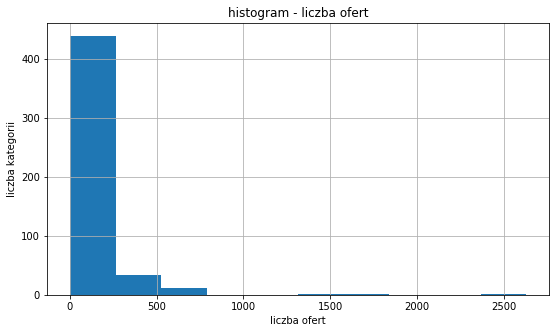

In [292]:
df.offers_count.plot.hist(figsize=(9,5))
plt.title("histogram - liczba ofert")
plt.xlabel('liczba ofert')
plt.ylabel('liczba kategorii')
plt.grid()
plt.savefig('./charts/histogram - liczba ofert.png')
plt.show()

In [293]:
down_boundary = q1-iqr*1.5
upper_boundary = q3+iqr*1.5

without_outliers = df[(df.offers_count < upper_boundary) & (df.offers_count > down_boundary)]

<p>Po pominięciem wartości odstających:</p>

In [294]:
without_outliers.quantile([.01,.25,.50,.75,.99])

,offers_count
0.01,1.00
0.25,10.00
0.50,26.00
0.75,66.75
0.99,187.00


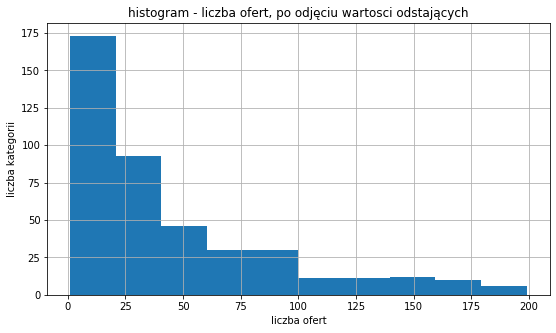

In [295]:
without_outliers.offers_count.plot.hist(figsize=(9,5))
plt.title("histogram - liczba ofert, po odjęciu wartosci odstających")
plt.xlabel('liczba ofert')
plt.ylabel('liczba kategorii')
plt.grid()
plt.savefig('./charts/histogram - liczba ofert, po odjęciu wartosci odstających.png')
plt.show()

In [296]:
outliers = df[~df.category.isin(without_outliers.category)]
outliers

,parent_category,category,offers_count
0,agd,pralki,296.0
4,agd,lodowki,503.0
13,agd,okapy,700.0
15,agd,zlewozmywaki,1676.0
17,agd,baterie-kuchenne,654.0
...,...,...,...
462,gry-i-konsole,fotele-i-stojaki-do-kierownicy,255.0
466,gry-i-konsole,gry-xbox-one,262.0
470,gry-i-konsole,gry-playstation-4,240.0
476,gry-i-konsole,myszy,638.0


##### 4.2.2.1 Wnioski

<p>Analiza przed pominięciem wartości odstających pokazała, iż ilość ofert w poszczególnych kategoriach jest bardzo zróżnicowana - widać to z resztą na histogramie.</p>
<p>
    Po pominięciu kategorii odstających oczom ukazał się obraz, iż większość kategorii posiada od 10 do 67 ofert.
    </p><p>Najczęściej kategorie mają po 33 oferty.
</p>

### Top 10 najwiekszych kategorii podrzędnych po kategoriach głównych:

In [297]:
categories_summary = df.set_index('category').groupby('parent_category').offers_count.nlargest(10)
categories_summary = categories_summary.reset_index()

grouped = categories_summary.groupby('parent_category')

for group in grouped.groups:
    print(f'\n{group}:\n')
    data = categories_summary[categories_summary.parent_category == group].loc[:, 'category':]
    print(data)


agd:

           category  offers_count
0      zlewozmywaki        1676.0
1             okapy         700.0
2  baterie-kuchenne         654.0
3           lodowki         503.0
4          patelnie         321.0
5            pralki         296.0
6            garnki         271.0
7           kuchnie         157.0
8          zmywarki         110.0
9          suszarki         107.0

agd-do-zabudowy:

                  category  offers_count
10            zlewozmywaki        1676.0
11                   okapy         700.0
12        baterie-kuchenne         654.0
13       plyty-do-zabudowy         444.0
14                    kawy         391.0
15                patelnie         321.0
16  piekarniki-do-zabudowy         318.0
17                  garnki         271.0
18    zmywarki-do-zabudowy         147.0
19     lodowki-do-zabudowy         112.0

agd-male:

                     category  offers_count
20                       kawy         391.0
21                   czajniki         382.0
22   